# Parte1 - CPT_1 - Exploração de dados

Alexandre Herrero Matias - 1890484

### **Nesta primeira entrega você deve apresentar os resultados da análise exploratória (caracterização) do dataset da competição (disponível no kaggle https://www.kaggle.com/t/43c48adfa2974254b1ab5f4d155033f0).**

### **É esperado visualizações e análises relevantes dos dados, com o intuito de proporcionar o entendimento das principais características dos dados. Além disso, é esperado a apresentação e discussão dos principais insights obtidos.**

### **Você pode aproveitar parte do que foi desenvolvido na lista de Exercícios 1. No entanto, uma extensão considerável e uma melhor apresentação é esperada.**

## Imports e organização dos dados

In [5]:
#Análise e manipulação de dados
import pandas as pd

#Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

#Recursos estatísticos
from scipy import stats

#Vizualização geoespacial
import folium
from folium.plugins import HeatMap

#DataFrames
train = pd.read_csv('X_trainCharlotte.csv')
trainReview = pd.read_csv('reviewsTrainCharlotte.csv')

#Better resolution
plt.rcParams['figure.figsize'] = [25, 5]

A primeira coisa feita foi organizar os DataSets separados de uma maneira que pudessem ser analisados juntos. Para isso é feito um join dos DataSets a partir da chave 'business_id'. O join é feito ignorando-se o conteúdo das avaliações e apenas somando as reações 'funny', 'cool' e 'useful' para cada valor de 'business_id'.

In [6]:
reviews = trainReview.groupby('business_id').sum()[['useful','funny','cool']]
trainJoin = pd.merge(train, reviews, on="business_id")

## Numero de avaliações x Popularidade

A primeira análise realizada será verificar uma relação entre o número de avaliações de um estabelecimento com sua popularidade. Esta análise parece interessante visto que intuitivamente acredita-se que um estabelicimento que recebeu varias avaliações deve ser popular. 

Antes da análise por si, é verificado a quantidade de estabelecimentos em função de sua classificação como popular ou não popular. Isto serve para dar uma noção da proporção entre os estabelecimentos que são considerados populares e os que não são.

In [8]:
sns.histplot(trainJoin['popular'])

<AxesSubplot:xlabel='popular', ylabel='Count'>

Em seguida é criado um scatter plot que verifica a relação entre o número de avaliações de um estabelecimento e se este estabelicimento é considerado popular. Com está análise reazliada é possivel perceber que a principio não parece haver nenhuma relação muito visivel entre o numero de avaliações e a popularidade do estabelecimento. Muitos estabelecimentos não populares não apresentavam muitas avaliações mas também a grande parte dos estabelecimentos populares também não apresentavam. Uma coisa interessantes que é possivel perceber nesta análise é justamente o contrario do que imaginavamos inicialmente, a maioria dos estabelecimentos com muitas avaliações está classificado como não popular, enquanto apenas 7 estabelecimentos populares apresentaram mais de 500 avaliações.

In [40]:
train.plot.scatter(x='review_count', y='popular')

<AxesSubplot:xlabel='review_count', ylabel='popular'>

A mesma análise foi feita levando em consideração as reações das avaliações de um estabelecimento. Entretanto, tal qual a quantidade de avaliações, não foi possivel perceber alguma relação direta entre as reações e a popularidade do estabelecimento. As reações de 'useful' e 'funny' se comportaram de maneira bem proxima da quantidade de avaliações, porém a reação 'cool' apresentou uma diferença onde mais estabelecimentos com muias avaições avaliações 'cool' estão classificados como populares, e apenas 2 estabelecimentos com mais de 500 reações 'cool' são não populares.

In [74]:
trainJoin.plot.scatter(x='useful', y='popular')

<AxesSubplot:xlabel='useful', ylabel='popular'>

In [75]:
trainJoin.plot.scatter(x='funny', y='popular')

<AxesSubplot:xlabel='funny', ylabel='popular'>

<AxesSubplot:xlabel='cool', ylabel='popular'>

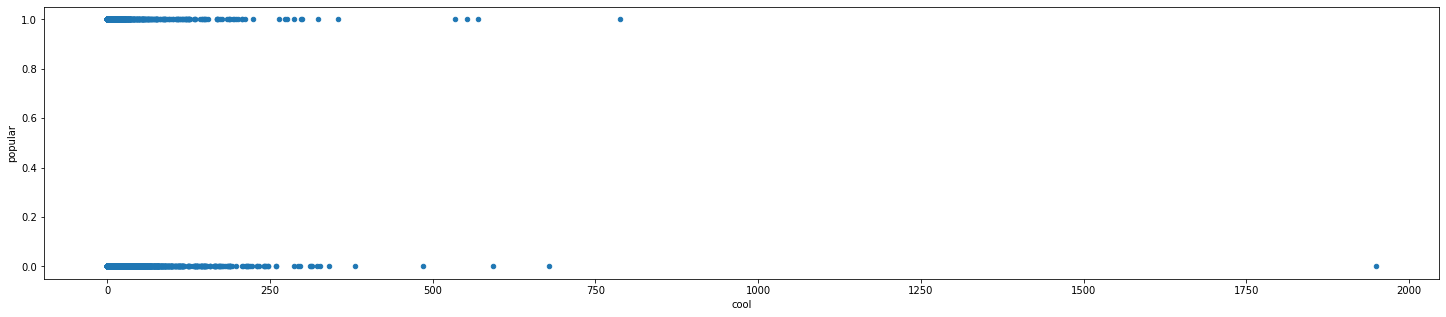

In [397]:
trainJoin.plot.scatter(x='cool', y='popular')

## Estabelecimento aberto x Popularidade

A segunda análise realizada foi verificar uma relação entre a popularidade do estabelecimento e o estabelecimento estar aberto.

Foi criada uma tabela de relação entre as duas caracteristiscas analisadas. Esta tabela conta a quantidade de estabelecimentos que estão fechados e não são populares, que estão fechados e são populares, que estão abertos e não são populares e, por fim, que estão abertos e são populares. Esta análise se mostrou um pouco mais reveladora visto que de todos os estabelecimentos populares podemos calcular que aproximadamente 89% destes estão abertos. Isto poderia indicar que estabelecimentos abertos tendem a ser mais populares, mas quando fazemos os mesmos calculos para os não populares changamos a conclusões parecidas, aproximadamente 81% dos estabelecimentos não populares estão abertos. Contudo o que podemos certamente concluir nesta análise é que, de todos os estabelecimentos, apenas 3% são não abertos e considerados populares, sendo assim estabelecimentos não abertos dificilmente são considerados populares.   

Text(0.36, 0.05, 'Abertos                                                                           Não abertos')

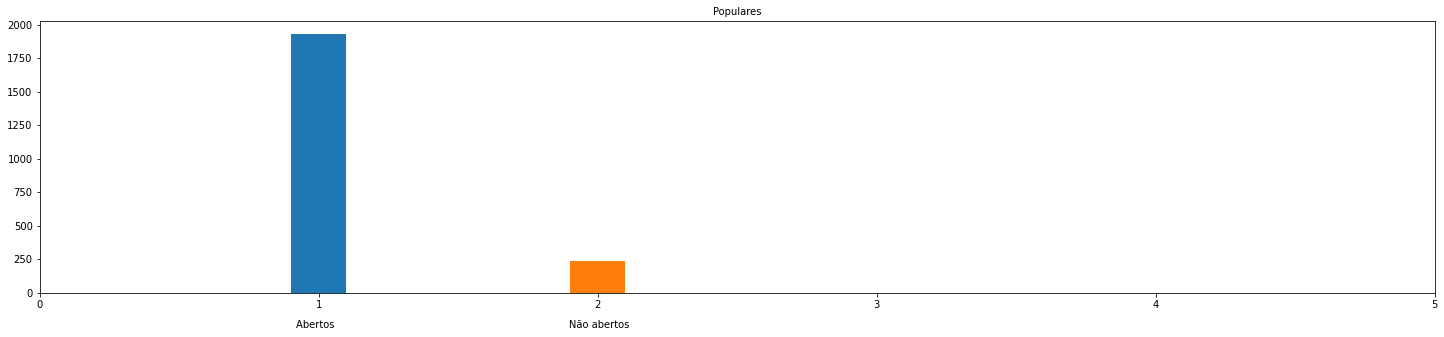

In [21]:
df = trainJoin.groupby(["is_open", "popular"]).size()
fig, ax = plt.subplots(1, 1)
ax.bar(1, df[1][1], width=0.2)
ax.bar(2, df[0][1], width=0.2)
ax.set_xlim(0, 5)
plt.title("Populares", fontsize=10)
plt.suptitle("Abertos                                                                           Não abertos", fontsize=10, y=0.05, x=0.36)

Text(0.36, 0.05, 'Abertos                                                                           Não abertos')

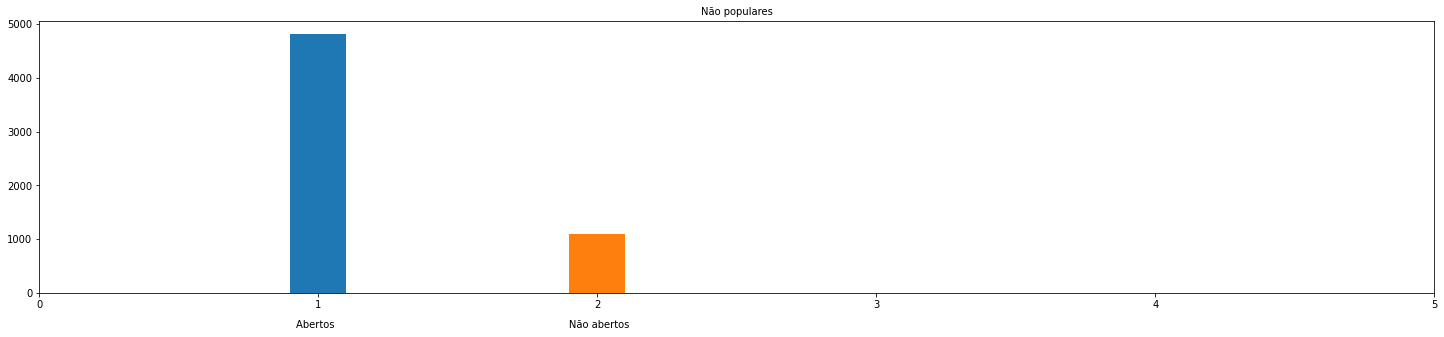

In [396]:
fig, ax = plt.subplots(1, 1)
ax.bar(1, df[1][0], width=0.2)
ax.bar(2, df[0][0], width=0.2)
ax.set_xlim(0, 5)
plt.title("Não populares", fontsize=10)
plt.suptitle("Abertos                                                                           Não abertos", fontsize=10, y=0.05, x=0.36)

## Categorias x Popularidade

A terceira análise realizada foi verificar uma relação entre as categorias dos estabelecimentos e quantos estabelecimentos são considerados populares para estas categorias.

Para esta análise foi criado um novo DataSet que relaciona cada categoria com a quantidade de estabelecimentos que a contém, a quantidade de estabelecimentos populares que contém esta categoria e a porcentagem destes em função do total de estabelecimentos por categoria. Ao analisar os resultados obtidos é possivel perceber que existem varias categorias com uma porcentagem de populariade de 100%, o que significa que todos os estabelecimentos com essa categoria são considerados populares. Para uma melhor visualização destes dados foi criado um histograma com as porcentagem de popularidade. Ao analizar o histograma é possivel perceber que além da grande quantidade de categoria com 0% de porcentagem de popularidade, há uma quantidade expressiva de categorias com 100% de porcentagem de popularidade. Entretanto isso não quer dizer necessariamente que estas categorias garantem a populariade do estabelecimento, na verdade o que acontece é uma subamostragem de estabelecimentos com estas categorias.

In [296]:
Categs = []
NumPop = []
NumTot = []
percen = []
for categ, pop in zip(trainJoin['categories'], trainJoin['popular']):
    categList = str(categ).split(", ")
    for items in categList:
        if(items not in Categs):
            Categs.append(items)
            NumPop.append(0)
            NumTot.append(0)
        if(pop == 1):
            NumPop[Categs.index(items)] += 1
        NumTot[Categs.index(items)] += 1
        
for pop, tot in zip(NumPop, NumTot):
    percen.append(int(round((pop/tot*100))))

df = pd.DataFrame(list(zip(Categs, NumTot, NumPop, percen)),columns =['category', 'category_count', 'popular_count', '%ofPop'])

<AxesSubplot:xlabel='%ofPop', ylabel='Count'>

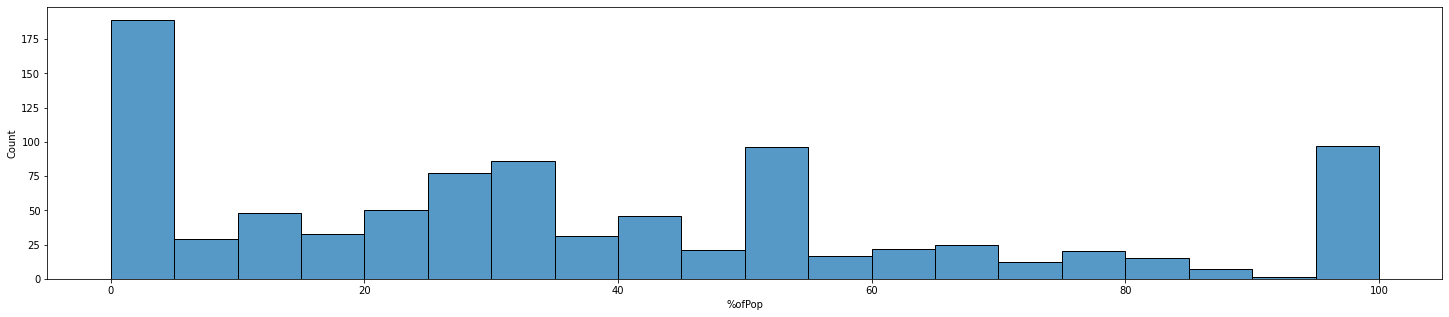

In [297]:
sns.histplot(df['%ofPop'], bins=20)

É possivel visualizar esta subamostragem quando criamos um histograma com a contagem total de estabelecimentos populares por categoria. As categorias com 0 estabelecimentos populares foram excluidas do histograma por serem muito mais expressivas que as demais, aproximadamente 800 categorias, dificultando a visualização. O que podemos perceber ao analizar o histograma é que a quantidade de categorias com menos de 10 estabelcimentos populares é muito maior do que qualquer outra. Isto nos mostra que existem muitas categorias subamostradas, o que gera a grande quantidade de catagorias com 100% de porgentagem de popularidade vista anteriormente.

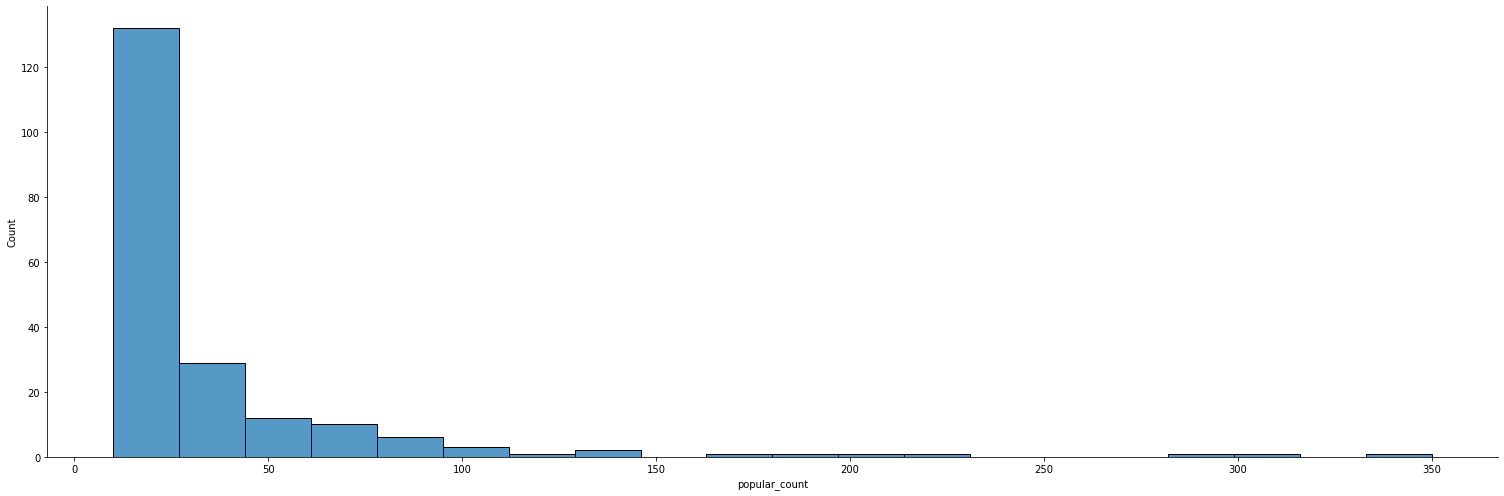

In [226]:
sns.displot(data=df, x='popular_count', kind='hist', bins=20, height=7, aspect=3, binrange=(10,350))

Porém uma segunda análise pode ser feita ao ordernar as categorias por numero de estabelecimentos populares e por porcetagem de popularidade. A partir disto podemos descobrir quais as categorias que realmente apresentam a maior quantidade de estabelecimentos populares com uma boa amostregem de estabelecimentos. Por fim podemos concluir que as categorias mais populares são 'Shopping' com 28% de estabelecimentos populares, 'Beauty & Spas' com 40% de estabelecimentos populares, 'Food' com 26% de estabelecimentos populares, 'Restaurants' com 13% de estabelecimentos populares e 'Health & Medical' com 41% de estabelecimentos populares.

In [229]:
df.sort_values(by=['popular_count','%ofPop'], ascending=False)

category  category_count  popular_count  %ofPop
10                     Shopping            1340            374      28
13                Beauty & Spas             924            372      40
5                          Food            1271            336      26
31                  Restaurants            2304            303      13
16             Health & Medical             692            282      41
..                          ...             ...            ...     ...
916              Opera & Ballet               1              0       0
917                  Rest Stops               1              0       0
918                   Bus Tours               1              0       0
919            Endocrinologists               1              0       0
921  Hunting & Fishing Supplies               1              0       0

[922 rows x 4 columns]

## Posição geográfica x Popularidade

A quarta análise realizada foi verificar uma relação entre a posição geográfica do estabelecimento e sua popularidade.

Para esta análise foram criados heatmaps a partir das informações de latitude e longitude de cada um dos estabelecimentos. Primeiramente foi criando um heatmap apenas com as coordenadas para que seja possivel vizualizar melhor onde os estabelecimentos se encontram no mapa. Em seguida o mesmo heatmap foi feito porém desta vez utilizado a informação de popularidade do estabelecimento como fator de peso para a intensidade do heatmap. Ao analizarmos ambos os heatmaps podemos perceber que não parece haver uma relação muito visivel entre as regiões geográficas e a popularidade do estabelecimento. Entretanto uma coisa a se notar é que os estabelecimentos populares parecem tender a ficaram proximos, não há muito estabelecimentos populares isolados. Sendo assim poderiamos concluir que se existe um estabelecimento popular na região é mais provavel que outros existam.

In [9]:
maxlat = trainJoin['latitude'].max()
minlon = trainJoin['longitude'].min()
mapaCharlotte = folium.Map(location=[maxlat, minlon])

pontos  = [[row['latitude'],row['longitude']] for index, row in trainJoin.iterrows()]

HeatMap(pontos).add_to(mapaCharlotte)
mapaCharlotte

In [10]:
pontos  = [[row['latitude'],row['longitude'], row['popular']] for index, row in trainJoin.iterrows()]

HeatMap(pontos).add_to(mapaCharlotte)
mapaCharlotte

## Horario de funcionamento nas sextas-feiras x Popularidade

A quinta análise realizada foi verificar uma relação entre o horario de funcionamento dos estabelecimentos nas sextas feiras e sua popularidade.

De forma análoga a análise das categorias para esta análise foi criado um novo DataSet que relaciona cada horario com a quantidade de estabelecimentos que o fazem, a quantidade de estabelecimentos populares que fazem este horario e a porcentagem destes em função do total de estabelecimentos por horario. A partir destes dados foram criados bar charts que relacionam os horarios de funcionamento com as outras informações. Ao analizar o primeiro bar chart é possivel perceber que os horarios com melhor porcentagem de popularidade são 1h, 2h e 3h. Entretando tal qual a análise das categorias estes resultados estão subamostrados, uma melhor análise é feita ao analiza-lo em conjunto com o segundo bar chart. Com isto podemos concluir que os horarios mais populares que apresentam uma melhor amostragem são 8h, 9h e 10h.

In [23]:
import json

HorFun = []
NumPop = []
NumTot = []
percen = []
for hour, pop in zip(trainJoin['hours'], trainJoin['popular']):
    if(hour == hour):
        hour = hour.replace("'", "\"")
        hourJson = json.loads(hour)
        if("Friday" in hourJson):
            friday = hourJson['Friday']
            temp = []
            for num in friday.split("-"):
                temp.append(num.split(":")[0])
            time = int(temp[1])-int(temp[0])
            if(time < 0):
                time = time*(-1)
                time = 24 - time
            elif(time == 0):
                time = 24
        if(time not in HorFun):
            HorFun.append(time)
            NumTot.append(0)
            NumPop.append(0)
        NumTot[HorFun.index(time)] += 1
        if(pop == 1):
            NumPop[HorFun.index(time)] += 1

for pop, tot in zip(NumPop, NumTot):
    percen.append(int(round((pop/tot*100))))

df = pd.DataFrame(list(zip(HorFun, NumTot, NumPop, percen)),columns =['hours', 'category_count', 'popular_count', '%ofPop'])

<BarContainer object of 24 artists>

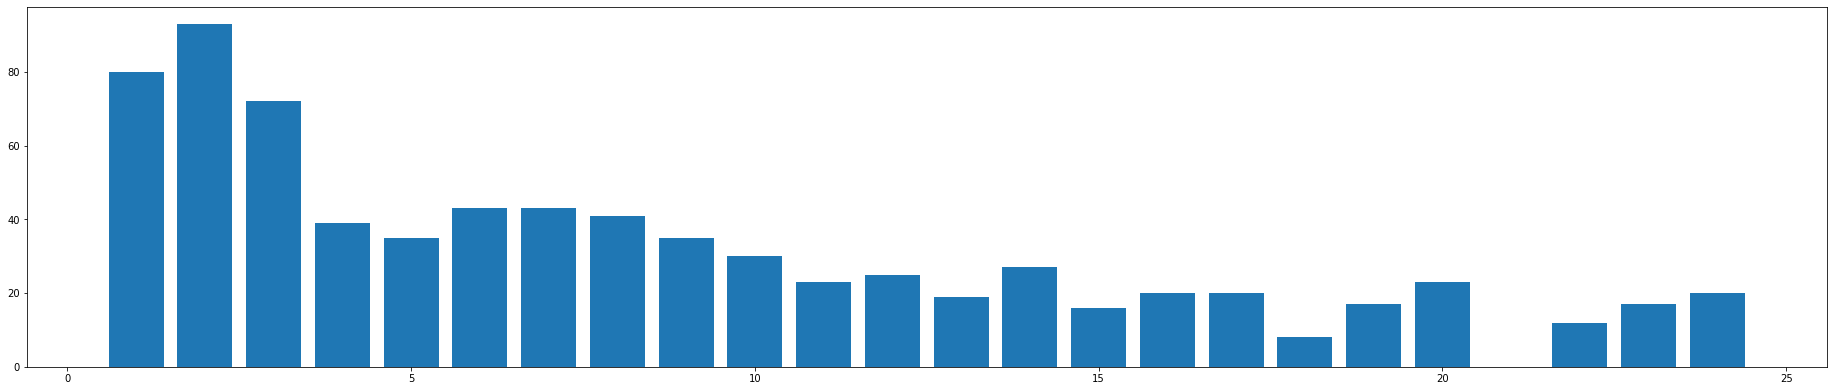

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df['hours'],df['%ofPop'])

<BarContainer object of 24 artists>

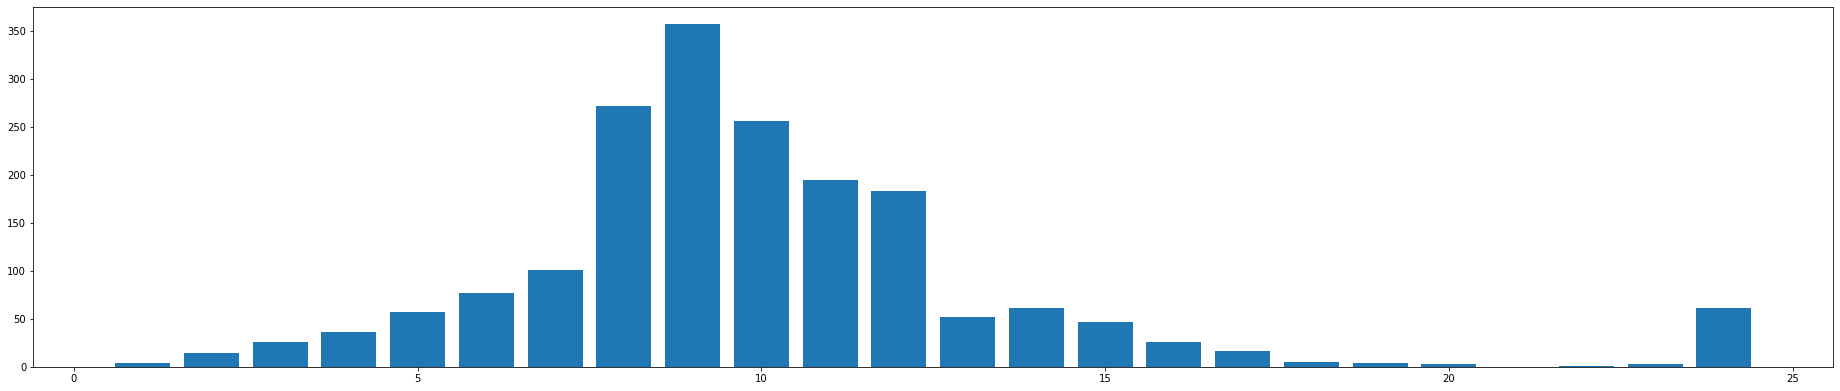

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df['hours'],df['popular_count'])

## Considerações finais

A partir das análises realizadas é possivel formar algumas hipóteses com relação ao que garante a popularidade de um estabelecimento. Em primeiro lugar a quantidade de avaliações parece não apresentar relação nenhuma com a popularidade do estabelecimento, o mesmo vale para as reações a estas análises. A localização geográfica do estabelecimento também não pareceu presentar relação com a popularidade, entretanto nos parece que estabelecimentos populares tendem a ficar mais proximos. As análises de estabelecimento aberto, categorias e horario de funcionamento nas sextas feiras parecem ser as que nos dão melhores hipóteses. A grande maioria dos estabelecimentos populares são abertos (89% de todos os populares). As categorias mais populares são 'Shopping' (28% de estabelecimentos populares), 'Beauty & Spas' (40% de estabelecimentos populares), 'Food' (26% de estabelecimentos populares), 'Restaurants' (13% de estabelecimentos populares) e 'Health & Medical' (41% de estabelecimentos populares). Os horarios de funcionamentos mais populares na sexta-feira são 8h (41% de estabelecimentos populares), 9h (35% de estabelecimentos populares) e 10h (30% de estabelecimentos populares).

Por fim nossa hipótese final é a seguinte: estabelecimentos abertos, pertencentes as categorias ['Shopping','Beauty & Spas','Food','Restaurants','Health & Medical'], com horarios de funcionamento na sexta-feira de [8h,9h,10h] e que não estão geograficamente muito isolados tem uma maior chance de serem considerados populares.